In [1]:
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('churn.csv')
data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [3]:
data.shape

(10000, 14)

In [4]:
dat = data.drop('CustomerId', axis='columns')
dat.head(3)

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [5]:
# dat = dat.drop('Surname', axis='columns')
dat.shape

(10000, 13)

In [6]:
dat.head(2)

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [7]:
dat.dtypes

RowNumber            int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
dat.isnull().sum()

RowNumber          0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
dat.Gender= dat.Gender.replace({'Female': 1, 'Male': 0})

C:\Users\EDWIN\AppData\Local\Temp\ipykernel_7140\934211632.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dat.Gender= dat.Gender.replace({'Female': 1, 'Male': 0})


In [10]:
dat.head(3)

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1


In [11]:
df = pd.concat([dat, pd.get_dummies(dat.Geography).astype(int)], axis='columns')
df = df.drop(['Geography', 'Surname'], axis='columns')
df.head(10)

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,1,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,6,645,0,44,8,113755.78,2,1,0,149756.71,1,0,0,1
6,7,822,0,50,7,0.00,2,1,1,10062.80,0,1,0,0
7,8,376,1,29,4,115046.74,4,1,0,119346.88,1,0,1,0
8,9,501,0,44,4,142051.07,2,0,1,74940.50,0,1,0,0
9,10,684,0,27,2,134603.88,1,1,1,71725.73,0,1,0,0


In [12]:
df.isnull().sum()


RowNumber          0
CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
France             0
Germany            0
Spain              0
dtype: int64

In [13]:
df.dtypes

RowNumber            int64
CreditScore          int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
France               int64
Germany              int64
Spain                int64
dtype: object

In [14]:
cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = MinMaxScaler()
df[cols_to_scale]= scaler.fit_transform(df[cols_to_scale])
df.head(3)

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,1,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,2,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,3,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0


In [15]:
x = df.drop('Exited', axis='columns')
y = df.Exited
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2)
xtrain.shape

(8000, 13)

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(13,), activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(xtrain, ytrain, epochs=10)

c:\Users\EDWIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5170 - loss: 114.0635
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7624 - loss: 0.6535
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7447 - loss: 0.6609
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7517 - loss: 0.6254
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7768 - loss: 0.5962
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7267 - loss: 0.6921
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7538 - loss: 0.6296
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7434 - loss: 0.7629
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7396 - loss: 0.7526
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7280 - loss: 0.8756


In [17]:
model.evaluate(xtest, ytest)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7931 - loss: 0.9954


[0.9628454446792603, 0.7979999780654907]

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


<Axes: >

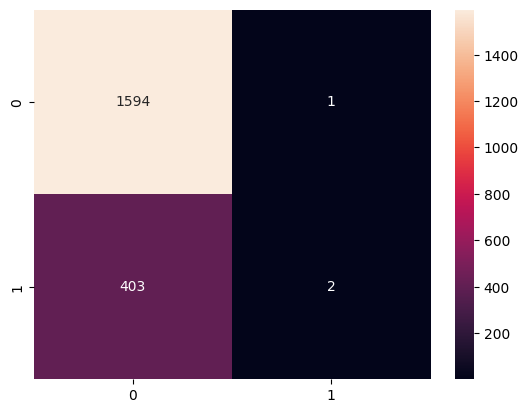

In [18]:
%matplotlib inline
pred = model.predict(xtest)
ypred = []
for i in pred:
    if i>0.5:
        ypred.append(1)
    else:
        ypred.append(0)

cm = confusion_matrix(ytest, ypred)
plt.xlabel('Predicted')
plt.ylabel('True')
sn.heatmap(cm, annot=True, fmt='d')


In [20]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1595
           1       0.67      0.00      0.01       405

    accuracy                           0.80      2000
   macro avg       0.73      0.50      0.45      2000
weighted avg       0.77      0.80      0.71      2000



In [33]:
#undersampling
df.shape

(10000, 14)

In [31]:
churn = df[df['Exited']==1]
no_churn = df[df['Exited']== 0]
churn.shape, no_churn.shape

((2037, 14), (7963, 14))

In [35]:
no_churn_undersample = no_churn.sample(2037)
no_churn_undersample.shape

(2037, 14)

In [37]:
#create a new dataframe with equal data
df_new = pd.concat([churn, no_churn_undersample], axis=0)
df_new.shape

(4074, 14)

In [41]:
a = df_new.iloc[:, :-1].values
b = df_new.iloc[:,-1].values

atrain, atest, btrain, btest = train_test_split(a,b, test_size=0.2, stratify=b)
atrain.shape

(3259, 13)

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(13,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(atrain, btrain, epochs=10)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6916 - loss: 27.6311
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6572 - loss: 0.7993
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6643 - loss: 1.1180
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6998 - loss: 0.8124
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7042 - loss: 0.7403
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7151 - loss: 0.6802
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7511 - loss: 0.7684
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7470 - loss: 0.5478
Epoch 9/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6642 - loss: 1.3335
Epoch 10/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7544 - loss: 0.5278


In [48]:
model.evaluate(atest, btest)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8143 - loss: 0.4765


[0.46870195865631104, 0.8134969472885132]

In [52]:
bpred = model.predict(atest)
b_pred = []
for i in bpred:
    if i> 0.5:
        b_pred.append(1)
    else:
        b_pred.append(0)

print(classification_report(btest, b_pred))

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       626
           1       0.58      0.68      0.63       189

    accuracy                           0.81       815
   macro avg       0.74      0.77      0.75       815
weighted avg       0.83      0.81      0.82       815



x_churn = x[x['churn']==1]

In [53]:
#OVERSAMPLING
churn.shape, no_churn.shape

((2037, 14), (7963, 14))

In [54]:
churn_new = churn.sample(7963, replace='true')
churn_new.shape

(7963, 14)

In [57]:
new_df = pd.concat([no_churn, churn_new],axis=0)
new_df.head(3)

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
1,2,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
3,4,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,5,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [58]:
x = new_df.iloc[:, :-1].values
y = new_df.iloc[:, -1].values
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, stratify=y)
xtrain.shape

(12740, 13)

In [63]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(13,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model2.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model2.fit(xtrain, ytrain, epochs=10)

Epoch 1/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7237 - loss: 0.7414
Epoch 2/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7542 - loss: 0.5607
Epoch 3/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7556 - loss: 0.5432
Epoch 4/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7685 - loss: 0.5169
Epoch 5/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7685 - loss: 0.4663
Epoch 6/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7627 - loss: 0.5042
Epoch 7/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7835 - loss: 0.4333
Epoch 8/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7992 - loss: 0.4044
Epoch 9/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7919 - loss: 0.4268
Epoch 10/10
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8161 - loss: 0.3626


In [64]:
model2.evaluate(xtest, ytest)

100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7787 - loss: 0.4721


[0.46943557262420654, 0.7802887558937073]

In [65]:
ypred = model2.predict(xtest)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [66]:
y_pred = []
for i in ypred:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2446
           1       0.52      0.87      0.65       740

    accuracy                           0.78      3186
   macro avg       0.73      0.81      0.74      3186
weighted avg       0.85      0.78      0.80      3186



In [68]:
#smote
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')


In [80]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [72]:
xsmote, ysmote = smote.fit_resample(x,y)

c:\Users\EDWIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\EDWIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [79]:
xtrain, xtest, ytrain, ytest = train_test_split(xsmote, ysmote, test_size=0.2, stratify=ysmote)

In [74]:
ann = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(13,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

ann.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

ann.fit(xtrain, ytrain, epochs=10)
ann.evaluate(xtest, ytest)

Epoch 1/10


c:\Users\EDWIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5151 - loss: 275.3457
Epoch 2/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5943 - loss: 0.7253
Epoch 3/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6846 - loss: 0.7992
Epoch 4/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7710 - loss: 0.5376
Epoch 5/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8182 - loss: 0.5026
Epoch 6/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9165 - loss: 0.3297
Epoch 7/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8772 - loss: 0.3505
Epoch 8/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9080 - loss: 0.3007
Epoch 9/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9862 - loss: 0.1784
Epoch 10/10
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9766 - loss: 0.1727
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5831 - loss: 2.0259


[1.959526538848877, 0.595016598701477]

In [75]:
ypred = ann.predict(xtest)
ypred[21]

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([0.00195293], dtype=float32)